# Introduction

In this project, you will build a neural network of your own design to evaluate the CIFAR-10 dataset.

To meet the requirements for this project, you will need to achieve an accuracy greater than 45%. 
If you want to beat Detectocorp's algorithm, you'll need to achieve an accuracy greater than 70%. 
(Beating Detectocorp's algorithm is not a requirement for passing this project, but you're encouraged to try!)

Some of the benchmark results on CIFAR-10 include:

78.9% Accuracy | [Deep Belief Networks; Krizhevsky, 2010](https://www.cs.toronto.edu/~kriz/conv-cifar10-aug2010.pdf)

90.6% Accuracy | [Maxout Networks; Goodfellow et al., 2013](https://arxiv.org/pdf/1302.4389.pdf)

96.0% Accuracy | [Wide Residual Networks; Zagoruyko et al., 2016](https://arxiv.org/pdf/1605.07146.pdf)

99.0% Accuracy | [GPipe; Huang et al., 2018](https://arxiv.org/pdf/1811.06965.pdf)

98.5% Accuracy | [Rethinking Recurrent Neural Networks and other Improvements for ImageClassification; Nguyen et al., 2020](https://arxiv.org/pdf/2007.15161.pdf)

Research with this dataset is ongoing. Notably, many of these networks are quite large and quite expensive to train. 

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [3]:
!awk '$3=="kB"{$2=$2/1024^2;$3="GB";} 1' /proc/meminfo | grep Mem

MemTotal: 15.6613 GB
MemFree: 12.015 GB
MemAvailable: 14.69 GB


In [2]:
print(f"Is cuda available?: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    dev = "cuda:0"
else:
    dev = "cpu"
device = torch.device(dev) 

Is cuda available?: True


## Load the Dataset

Specify your transforms as a list first.
The transforms module is already loaded as `transforms`.

CIFAR-10 is fortunately included in the torchvision module.
Then, you can create your dataset using the `CIFAR10` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [41]:
# Define transforms
## YOUR CODE HERE ##

#define some random data augmentation to improve the learning of meaningfull features and improve the generalization

train_transform = transforms.Compose([transforms.RandomCrop((32),padding=4),
                                      transforms.RandomHorizontalFlip(p=0.4),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

test_transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

view_transform = transforms.Compose([transforms.ToTensor()])

batch_size = 64

# Create training set and define training dataloader
## YOUR CODE HERE ##
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)

# Create test set and define test dataloader
## YOUR CODE HERE ##
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True,num_workers=2,pin_memory=True)

viewset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=view_transform)
viewloader = torch.utils.data.DataLoader(viewset, batch_size=batch_size, shuffle=True)

# The 10 classes in the dataset
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [4]:
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(classes[labels[i]])
    
        image = images[i].numpy()
        plt.imshow(np.rot90(image.T, k=3))
        plt.show()

frog


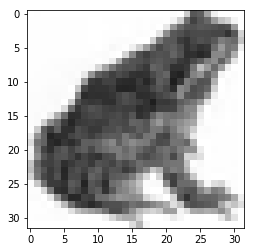

truck


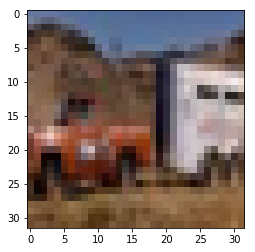

bird


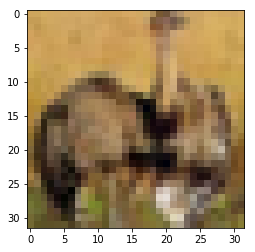

plane


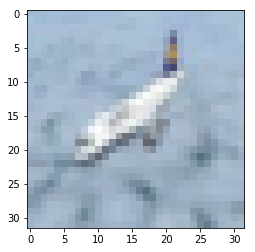

truck


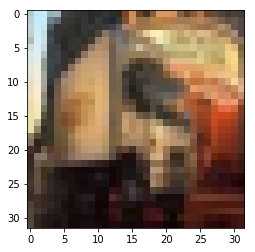

In [5]:
# Explore data
## YOUR CODE HERE ##
show5(viewloader)

Let's check the size and shape of the images:

In [6]:
batch = next(iter(trainloader))
labels = batch[1][0:5]
images = batch[0][0:5]
images.shape

torch.Size([5, 3, 32, 32])

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset. 
Feel free to construct a model of any architecture – feedforward, convolutional, or even something more advanced!

In [10]:
## YOUR CODE HERE ##

n_input = 32*32*3

n_fc1 = 1024

n_fc2 = 1024

n_fc3 = 512

n_fc4 = 256

n_fc5 = 64

n_out = 10


model = nn.Sequential(
                nn.Linear(n_input,n_fc1),
                nn.ReLU(),
                nn.Linear(n_fc1,n_fc2),
                nn.ReLU(),
                nn.Linear(n_fc2,n_fc3),
                nn.ReLU(),
                nn.Linear(n_fc3,n_fc4),
                nn.ReLU(),
                nn.Linear(n_fc4,n_fc5),
                nn.ReLU(),
                nn.Linear(n_fc5,n_out),
                nn.Softmax(dim=1)
)

model.to(device)

Sequential(
  (0): Linear(in_features=3072, out_features=1024, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1024, out_features=1024, bias=True)
  (3): ReLU()
  (4): Linear(in_features=1024, out_features=512, bias=True)
  (5): ReLU()
  (6): Linear(in_features=512, out_features=256, bias=True)
  (7): ReLU()
  (8): Linear(in_features=256, out_features=64, bias=True)
  (9): ReLU()
  (10): Linear(in_features=64, out_features=10, bias=True)
  (11): Softmax()
)

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [11]:
## YOUR CODE HERE ##

#predicting C classes and utilize the great stability of this loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.9)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss during each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [12]:
## YOUR CODE HERE ##
train_losses = []
test_losses = []
epochs = 120
for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.view(inputs.shape[0], -1).to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels.to(device))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
    if epoch%10 == 0:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()
            for inputs, labels in testloader:
                inputs = inputs.view(inputs.shape[0], -1).to(device)
                log_ps = model(inputs)
                test_loss += criterion(log_ps, labels.to(device))
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class.to(device) == labels.view(*top_class.to(device).shape).to(device)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(epoch+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

print('Finished Training')

Epoch: 1/120..  Training Loss: 2.303..  Test Loss: 2.303..  Test Accuracy: 0.100
Epoch: 11/120..  Training Loss: 2.155..  Test Loss: 2.135..  Test Accuracy: 0.317
Epoch: 21/120..  Training Loss: 2.062..  Test Loss: 2.035..  Test Accuracy: 0.422
Epoch: 31/120..  Training Loss: 2.020..  Test Loss: 2.015..  Test Accuracy: 0.440
Epoch: 41/120..  Training Loss: 1.996..  Test Loss: 1.985..  Test Accuracy: 0.473
Epoch: 51/120..  Training Loss: 1.979..  Test Loss: 1.984..  Test Accuracy: 0.473
Epoch: 61/120..  Training Loss: 1.962..  Test Loss: 1.996..  Test Accuracy: 0.460
Epoch: 71/120..  Training Loss: 1.950..  Test Loss: 1.952..  Test Accuracy: 0.503
Epoch: 81/120..  Training Loss: 1.937..  Test Loss: 1.955..  Test Accuracy: 0.503
Epoch: 91/120..  Training Loss: 1.928..  Test Loss: 1.932..  Test Accuracy: 0.524
Epoch: 101/120..  Training Loss: 1.921..  Test Loss: 1.936..  Test Accuracy: 0.522
Epoch: 111/120..  Training Loss: 1.914..  Test Loss: 1.914..  Test Accuracy: 0.545
Finished Traini

Plot the training loss (and validation loss/accuracy, if recorded).

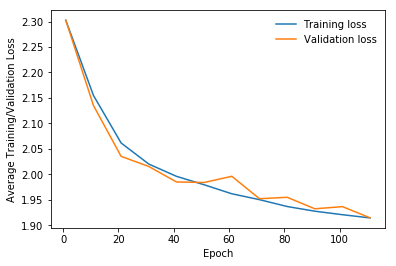

In [18]:
## YOUR CODE HERE ##
x_axis_val = np.arange(1,epochs+1,10)
plt.plot(x_axis_val,train_losses, label='Training loss')
plt.plot(x_axis_val,test_losses, label='Validation loss')
plt.xlabel("Epoch")
plt.ylabel("Average Training/Validation Loss")
plt.legend(frameon=False)
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 70%, great work! 
This is a hard task to exceed 70% on.

If your accuracy is under 45%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [17]:
## YOUR CODE HERE ##
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        inputs = inputs.view(inputs.shape[0], -1).to(device)
        # calculate outputs by running images through the network
        outputs = model(inputs)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

Accuracy of the network on the test images: 53 %


## Saving your model
Using `torch.save`, save your model for future loading.

In [15]:
## YOUR CODE HERE ##
torch.save(model.state_dict(),"udacity_model_naive.pth")

## Make a Recommendation

Based on your evaluation, what is your recommendation on whether to build or buy? Explain your reasoning below.

Some things to consider as you formulate your recommendation:
* How does your model compare to Detectocorp's model?
* How does it compare to the far more advanced solutions in the literature? 
* What did you do to get the accuracy you achieved? 
* Is it necessary to improve this accuracy? If so, what sort of work would be involved in improving it?



**Answer:**

The great thing about this model is that the training and validation loss are very close to each other. So there is no overfitting! The loss function over the training period also shows some learning/improvement of the neural network!

* Compared to the Detectocorp's model there are still some room for improvements, as we still have to overcome a gap in accuracy of 17%. But to be fair, the accuracy of Detectocorp is still way below the baseline results from the literature. So it would not make sense to buy this technology, as it is still below state of the art and we should be able to beat it with some additional development iterations. 

* Compared to the literature there is a lof of potential for improvement! The main difference between my model and the models from the literature is the deep neural network architecture. So it would be wise to investigate different networks compared to my naive approach.

* To achieve this accuracy, I applied some image augmentation. I also tried training with dropout, but suprisingly there was a faster training/validation gap and the accuracy dropped below 50%. To improve the accuracy from my initial network, I added more fully connected layers to deepen the network architecture. I also changed the optimizer from Adam to SGD, as it showed improved results.

* The network is way better than a random classifier, which would achieve an accuracy of around 10%, given that there are ten class labels. But the 53% accuracy on the test set are still below the state of the art. So it would be logical to investigate more advanced network architectures to increase the architecture. I also did not apply any parameter tuning to the data and model on hand. This would also increase the chance to improve the overall results. 

Based on the results of the investigation, I would not recommend to buy the Technology of Detectocorp. Depending on the desired accuracy, it is better to build an own solution. If they really want to buy the tech, they should use some more advanced tech as the state of the art is around 98%-99% accuracy.

## Test more complex model

Even if my model seems to pass the criteria of this project, I want to test another model, which is more sophisticated, but easy to implement. I will try an "easy" VGG-Net architecture, which achieved very good results. The paper with the architecture can be found here: https://arxiv.org/abs/1409.1556
I tried to implement VGG11, but because of memory reasons I had to reduce the depth of the network. So it is more a "VGG like" network. 
Covolutional neural networks work very good for image recognition. More details can be found in the great course page from the Stanford course **CS231n**: https://cs231n.github.io/convolutional-networks/

In [45]:
class VGG_like(nn.Module):
    def __init__(self):
        super(VGG_like, self).__init__()
        # convolutional layers
        self.conv_train = self.make_conv_layer()
        
        # linear layer (4096 -> 10)
        self.fc1 = nn.Linear(4096, 10)
        #softmax
        self.softmax = nn.Softmax(dim=1)
    
    #neat trick from official pytorch vgg implementation https://github.com/pytorch/vision/blob/main/torchvision/models/vgg.py
    #to automate the repetitive architecture building
    def make_conv_layer(self):
        in_channels = 3
        layers = []
        #vgg11 = [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M',512, 512, 'M']
        #consumes too much memory, so I reduce the depth of the network
        vgg_like_out = [64, 'M', 128, 'M', 256, 256, 'M']
        for out in vgg_like_out:
            #max pool
            if(out=="M"):
                layers += [nn.MaxPool2d(2, 2)]
            #else conv layer
            else:
                layers += [nn.Conv2d(in_channels, out, kernel_size=3, padding=1),
                           #it is common practice to add BatchNorm after convolutional layers
                           nn.BatchNorm2d(out),
                           nn.ReLU()]
                in_channels = out
        return nn.Sequential(*layers)
                

    def forward(self,x):
        #Layer0
        x = self.conv_train(x)
        #Layer 5
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.softmax(x)
        return x
        

In [46]:
## YOUR CODE HERE ##
model = VGG_like()
model.to(device)
#predicting C classes and utilize the great stability of this loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.9)

In [47]:
## YOUR CODE HERE ##
train_losses = []
test_losses = []
epochs = 120
for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs.to(device))
        loss = criterion(outputs, labels.to(device))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
    if epoch%10 == 0:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()
            for inputs, labels in testloader:
                log_ps = model(inputs.to(device))
                test_loss += criterion(log_ps, labels.to(device))
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class.to(device) == labels.view(*top_class.to(device).shape).to(device)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(epoch+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

print('Finished Training')

Epoch: 1/120..  Training Loss: 2.127..  Test Loss: 2.046..  Test Accuracy: 0.410
Epoch: 11/120..  Training Loss: 1.895..  Test Loss: 1.899..  Test Accuracy: 0.561
Epoch: 21/120..  Training Loss: 1.830..  Test Loss: 1.809..  Test Accuracy: 0.652
Epoch: 31/120..  Training Loss: 1.764..  Test Loss: 1.789..  Test Accuracy: 0.673
Epoch: 41/120..  Training Loss: 1.743..  Test Loss: 1.766..  Test Accuracy: 0.696
Epoch: 51/120..  Training Loss: 1.731..  Test Loss: 1.751..  Test Accuracy: 0.710
Epoch: 61/120..  Training Loss: 1.721..  Test Loss: 1.749..  Test Accuracy: 0.713
Epoch: 71/120..  Training Loss: 1.713..  Test Loss: 1.743..  Test Accuracy: 0.717
Epoch: 81/120..  Training Loss: 1.706..  Test Loss: 1.742..  Test Accuracy: 0.716
Epoch: 91/120..  Training Loss: 1.643..  Test Loss: 1.689..  Test Accuracy: 0.786
Epoch: 101/120..  Training Loss: 1.630..  Test Loss: 1.669..  Test Accuracy: 0.818
Epoch: 111/120..  Training Loss: 1.555..  Test Loss: 1.606..  Test Accuracy: 0.856
Finished Traini

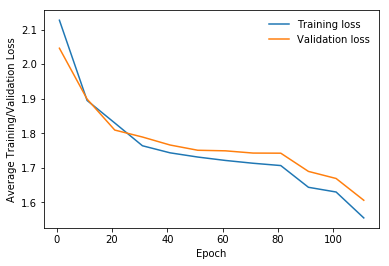

In [48]:
## YOUR CODE HERE ##
x_axis_val = np.arange(1,epochs+1,10)
plt.plot(x_axis_val,train_losses, label='Training loss')
plt.plot(x_axis_val,test_losses, label='Validation loss')
plt.xlabel("Epoch")
plt.ylabel("Average Training/Validation Loss")
plt.legend(frameon=False)
plt.show()

In [49]:
## YOUR CODE HERE ##
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        # calculate outputs by running images through the network
        outputs = model(inputs.to(device))
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

Accuracy of the network on the test images: 85 %


In [50]:
## YOUR CODE HERE ##
torch.save(model.state_dict(),"udacity_model_vgglike.pth")

## Final evaluation

And I managed to beat Detectocorp's benchmark! The VGG-architecture is even an older architecture (2014) and easily implementabel. The downside are the high memory requirements and that training is slower. But this shows, that it is more than possible to achieve an accuracy over 70% and even improve the benchmark with an accurarcy of 85%! It would be interesting to see how far we can push the accuracy with longer training time. It also notable that we did not tune anything here.

## Submit Your Project

When you are finished editing the notebook and are ready to turn it in, simply click the **SUBMIT PROJECT** button in the lower right.

Once you submit your project, we'll review your work and give you feedback if there's anything that you need to work on. If you'd like to see the exact points that your reviewer will check for when looking at your work, you can have a look over the project [rubric](https://review.udacity.com/#!/rubrics/3077/view).